In [134]:
import pandas as pd
import numpy as np
from loaders import wind_data
import datetime

TEST_SIZE = 50
TRAIN_SIZE = 681
ZONES = ['ZONE_1', 'ZONE_2', 'ZONE_3','ZONE_4','ZONE_5','ZONE_6','ZONE_7','ZONE_8','ZONE_9','ZONE_10']

wind_GEF = wind_data(path_name='data/wind_data_all_zone.csv', test_size=TEST_SIZE, random_state=0)
wind_df = pd.read_csv('data/wind_data_all_zone.csv')

wind_df['OLD_TIMESTAMP'] =  pd.to_datetime(wind_df['TIMESTAMP'], format='%Y-%m-%d %H:%M:%S.%f')
wind_df['TIMESTAMP'] =  pd.DatetimeIndex(wind_df['OLD_TIMESTAMP']) + pd.offsets.Hour(-1)
wind_df['new_date'] = [d.date() for d in wind_df['TIMESTAMP']]
wind_df

#LS 631 days #VS 50 days # TEST 50 days
#LS 631 days #VS 50 days # TEST 50 days
#LS 631 days #VS 50 days # TEST 50 days
#LS 631 days #VS 50 days # TEST 50 days
#LS 631 days #VS 50 days # TEST 50 days
#LS 631 days #VS 50 days # TEST 50 days
#LS 631 days #VS 50 days # TEST 50 days
#LS 631 days #VS 50 days # TEST 50 days
#LS 631 days #VS 50 days # TEST 50 days
#LS 631 days #VS 50 days # TEST 50 days


,TIMESTAMP,TARGETVAR,U10,V10,U100,V100,ZONE_1,ZONE_2,ZONE_3,ZONE_4,ZONE_5,ZONE_6,ZONE_7,ZONE_8,ZONE_9,ZONE_10,OLD_TIMESTAMP,new_date
0,2012-01-01 00:00:00,0.000000,2.124600,-2.681966,2.864280,-3.666076,1,0,0,0,0,0,0,0,0,0,2012-01-01 01:00:00,2012-01-01
1,2012-01-01 01:00:00,0.054879,2.521695,-1.796960,3.344859,-2.464761,1,0,0,0,0,0,0,0,0,0,2012-01-01 02:00:00,2012-01-01
2,2012-01-01 02:00:00,0.110234,2.672210,-0.822516,3.508448,-1.214093,1,0,0,0,0,0,0,0,0,0,2012-01-01 03:00:00,2012-01-01
3,2012-01-01 03:00:00,0.165116,2.457504,-0.143642,3.215233,-0.355546,1,0,0,0,0,0,0,0,0,0,2012-01-01 04:00:00,2012-01-01
4,2012-01-01 04:00:00,0.156940,2.245898,0.389576,2.957678,0.332701,1,0,0,0,0,0,0,0,0,0,2012-01-01 05:00:00,2012-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175435,2013-12-31 19:00:00,0.792143,1.032363,-6.281558,2.041033,-11.220655,0,0,0,0,0,0,0,0,0,1,2013-12-31 20:00:00,2013-12-31
175436,2013-12-31 20:00:00,0.792143,1.702361,-6.202448,2.846245,-10.486079,0,0,0,0,0,0,0,0,0,1,2013-12-31 21:00:00,2013-12-31
175437,2013-12-31 21:00:00,0.792143,5.086629,-1.261378,7.382256,-3.097656,0,0,0,0,0,0,0,0,0,1,2013-12-31 22:00:00,2013-12-31
175438,2013-12-31 22:00:00,0.792143,4.183751,-1.580172,5.789054,-2.116548,0,0,0,0,0,0,0,0,0,1,2013-12-31 23:00:00,2013-12-31


In [137]:
import datetime

test_dates = []
for d in wind_GEF[5].index:
    test_dates.append(d.date())

train_dates = []
for d in wind_GEF[1].index:
    train_dates.append(d.date())
for d in wind_GEF[3].index:
    train_dates.append(d.date())

test_dates = pd.Series(test_dates)
train_dates = pd.Series(train_dates)
train = wind_df[~wind_df['new_date'].isin(test_dates.unique())].copy()
test = wind_df[wind_df['new_date'].isin(test_dates.unique())].copy()
x_train = train[['U10', 'V10', 'U100', 'V100', 'ZONE_1', 'ZONE_2', 'ZONE_3','ZONE_4','ZONE_5','ZONE_6','ZONE_7','ZONE_8','ZONE_9','ZONE_10']]
x_test = test[['U10', 'V10', 'U100', 'V100', 'ZONE_1', 'ZONE_2', 'ZONE_3','ZONE_4','ZONE_5','ZONE_6','ZONE_7','ZONE_8','ZONE_9','ZONE_10']]
y_train = train['TARGETVAR']
y_test = test['TARGETVAR']

In [21]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_pinball_loss, mean_squared_error

num_quantiles = 100
quantiles = np.arange(0, 1, 1/num_quantiles)[1:]

common_params = dict(
    learning_rate=0.05,
    n_estimators=600,
    max_depth=7,
    min_samples_leaf=9,
    min_samples_split=9,
)

predictions = []
train_predictions = []
for alpha in quantiles:
    gbr = GradientBoostingRegressor(loss="quantile", alpha=alpha, **common_params)
    model = gbr.fit(x_train, y_train)
    y_pred = gbr.predict(x_test)

    x_pred = gbr.predict(x_train)
    predictions.append(y_pred)
    train_predictions.append(x_pred)
predictions = np.array(predictions)
train_predictions = np.array(train_predictions)

In [138]:
sorted_predictions = np.sort(predictions, axis=0)
sorted_train_predictions = np.sort(train_predictions, axis=0)

results = []
for i, q in enumerate(quantiles):
    results.append(mean_pinball_loss(y_test, sorted_predictions[i], alpha=q))

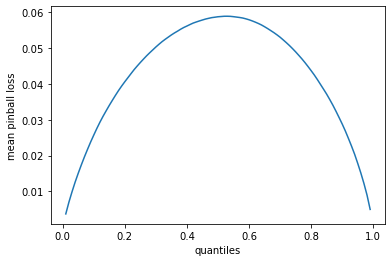

In [139]:
import matplotlib.pyplot as plt

plt.plot(quantiles, results)
plt.ylabel('mean pinball loss')
plt.xlabel('quantiles')
plt.show()

Quantile sqore: 4.265592223907155


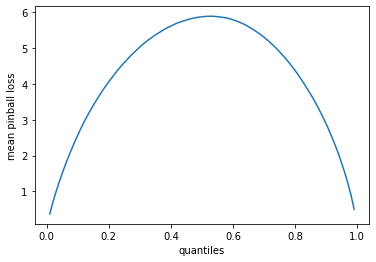

In [140]:
import metrics

plf = metrics.plf_per_quantile(sorted_predictions, y_test)
print("Quantile sqore:", plf.mean())
plt.plot(quantiles, plf)
plt.ylabel('mean pinball loss')
plt.xlabel('quantiles')
plt.show()

In [141]:
y_copy = pd.DataFrame(y_test.copy())
y_copy['pos'] = np.arange(y_test.shape[0])
y_copy['old_pos'] = y_copy.index
y_copy

,TARGETVAR,pos,old_pos
24,0.439244,0,24
25,0.205808,1,25
26,0.190020,2,26
27,0.803496,3,27
28,0.755004,4,28
...,...,...,...
175387,0.285135,11995,175387
175388,0.210316,11996,175388
175389,0.135190,11997,175389
175390,0.030001,11998,175390


C:\Users\kolom\miniconda3\lib\site-packages\scipy\interpolate\interpolate.py:630: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
C:\Users\kolom\miniconda3\lib\site-packages\scipy\interpolate\interpolate.py:633: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


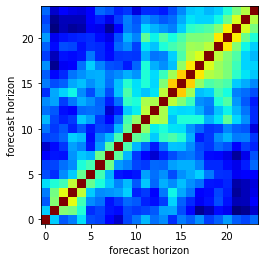

In [142]:
import copula
idx = np.arange(TEST_SIZE)
np.random.shuffle(idx)
ZONE = 'ZONE_6'
cov_matrix = np.identity(24)

for i in idx:
    pred = pd.DataFrame(sorted_predictions[:,y_copy[y_copy['old_pos'].isin(wind_df[(wind_df['new_date'] == test_dates.unique()[i]) & (wind_df[ZONE] == 1)].index)]['pos']].T)
    actual_data = y_copy[y_copy['old_pos'].isin(wind_df[(wind_df['new_date'] == test_dates.unique()[i]) & (wind_df[ZONE] == 1)].index)]['TARGETVAR']
    cov_matrix = copula.update_cov_matrix(df_y_pred_q=pred, quantiles=quantiles, 
                      actual_data=actual_data, forget_factor=0.98, cov_matrix=cov_matrix)
    
plt.imshow(cov_matrix, cmap='jet', origin='lower')
plt.xlabel('forecast horizon')
plt.ylabel('forecast horizon')

plt.show()

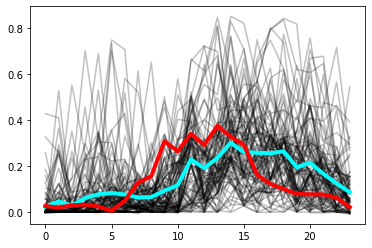

In [143]:
N_SCENARIOS = 100

ZONE = 'ZONE_6'
pred = pd.DataFrame(sorted_predictions[:,y_copy[y_copy['old_pos'].isin(wind_df[(wind_df['new_date'] == test_dates.unique()[-1]) & (wind_df[ZONE] == 1)].index)]['pos']].T)
actual_data = y_copy[y_copy['old_pos'].isin(wind_df[(wind_df['new_date'] == test_dates.unique()[-1]) & (wind_df[ZONE] == 1)].index)]['TARGETVAR']

generated_scenarios = copula.sample_from_quantiles(df_y_pred_q=pred, quantiles=quantiles, cov_matrix=cov_matrix, n_scenarios=100, rnd_seed=[0], sort=True)
plt.plot(generated_scenarios.values, color='k', alpha=0.25)
plt.plot(generated_scenarios.values.mean(axis=1), color='cyan', label='Generated Scenarios Mean', linewidth=4)
plt.plot(np.arange(24), actual_data, color='red', linewidth=4)
plt.show()

In [144]:
ZONES = ['ZONE_1', 'ZONE_2', 'ZONE_3','ZONE_4','ZONE_5','ZONE_6','ZONE_7','ZONE_8','ZONE_9','ZONE_10']
y_to_pass = []
scenarios_pred = []
for zone in ZONES:

    for i in range(TEST_SIZE):
        pred = pd.DataFrame(sorted_predictions[:,y_copy[y_copy['old_pos'].isin(wind_df[(wind_df['new_date'] == test_dates.unique()[i]) & (wind_df[zone] == 1)].index)]['pos']].T)
        actual_data = y_copy[y_copy['old_pos'].isin(wind_df[(wind_df['new_date'] == test_dates.unique()[i]) & (wind_df[zone] == 1)].index)]['TARGETVAR']
        generated_scenarios = copula.sample_from_quantiles(df_y_pred_q=pred, quantiles=quantiles, cov_matrix=cov_matrix, n_scenarios=N_SCENARIOS, rnd_seed=[0], sort=True)
        scenarios_pred.append(generated_scenarios)
        y_to_pass.append(actual_data)


In [145]:
y_to_pass = np.array(y_to_pass)

scenarios_pred = np.array(scenarios_pred)
scenarios_pred = scenarios_pred.reshape(-1, N_SCENARIOS)
scenarios_pred.shape

(12000, 100)

In [146]:
import metrics

energy_scoring = metrics.energy_score(scenarios_pred, y_to_pass)
np.array(energy_scoring).mean() * 100

53.81359196943727

In [147]:
import copula
y_train_copy = pd.DataFrame(y_train.copy())
y_train_copy['pos'] = np.arange(y_train.shape[0])
y_train_copy['old_pos'] = y_train_copy.index

TRAIN_SIZE = 681
idx = np.arange(TRAIN_SIZE)
np.random.shuffle(idx)

cov_matrixes = {}
for zone in zones:
    cov_matrixes[zone] = np.identity(24)
    for i in idx:
        pred = pd.DataFrame(sorted_train_predictions[:,y_train_copy[y_train_copy['old_pos'].isin(wind_df[(wind_df['new_date'] == train_dates.unique()[i]) & (wind_df[zone] == 1)].index)]['pos']].T)
        actual_data = y_train_copy[y_train_copy['old_pos'].isin(wind_df[(wind_df['new_date'] == train_dates.unique()[i]) & (wind_df[zone] == 1)].index)]['TARGETVAR']
        cov_matrixes[zone] = copula.update_cov_matrix(df_y_pred_q=pred, quantiles=quantiles, 
                          actual_data=actual_data, forget_factor=0.99, cov_matrix=cov_matrixes[zone])
        
y_to_pass = []
scenarios_pred = []
for zone in zones:

    for i in range(TEST_SIZE):
        pred = pd.DataFrame(sorted_predictions[:,y_copy[y_copy['old_pos'].isin(wind_df[(wind_df['new_date'] == test_dates.unique()[i]) & (wind_df[zone] == 1)].index)]['pos']].T)
        actual_data = y_copy[y_copy['old_pos'].isin(wind_df[(wind_df['new_date'] == test_dates.unique()[i]) & (wind_df[zone] == 1)].index)]['TARGETVAR']
        generated_scenarios = copula.sample_from_quantiles(df_y_pred_q=pred, quantiles=quantiles, cov_matrix=cov_matrixes[zone], n_scenarios=N_SCENARIOS, rnd_seed=[0], sort=True)
        scenarios_pred.append(generated_scenarios)
        y_to_pass.append(actual_data)

y_to_pass = np.array(y_to_pass)

scenarios_pred = np.array(scenarios_pred)
scenarios_pred = scenarios_pred.reshape(-1, N_SCENARIOS)

energy_scoring = metrics.energy_score(scenarios_pred, y_to_pass)
print("Average energy score:", np.array(energy_scoring).mean() * 100)

C:\Users\kolom\miniconda3\lib\site-packages\scipy\interpolate\interpolate.py:630: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
C:\Users\kolom\miniconda3\lib\site-packages\scipy\interpolate\interpolate.py:633: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


Average energy score: 53.702010824097655


In [202]:
dict_results = {}
mean_scores = []
for zone in zones:
    y_to_pass = []
    scenarios_pred = []
    weather_features = []
    for i in range(TEST_SIZE):
        pred = pd.DataFrame(sorted_predictions[:,y_copy[y_copy['old_pos'].isin(wind_df[(wind_df['new_date'] == test_dates.unique()[i]) & (wind_df[zone] == 1)].index)]['pos']].T)
        actual_data = y_copy[y_copy['old_pos'].isin(wind_df[(wind_df['new_date'] == test_dates.unique()[i]) & (wind_df[zone] == 1)].index)]['TARGETVAR']
        weather_features_day = wind_df[(wind_df['new_date'] == test_dates.unique()[i]) & (wind_df[zone] == 1)][['U10', 'V10', 'U100', 'V100']]
        generated_scenarios = copula.sample_from_quantiles(df_y_pred_q=pred, quantiles=quantiles, cov_matrix=cov_matrixes[zone], n_scenarios=N_SCENARIOS, rnd_seed=[0], sort=True)
        weather_features.append(weather_features_day)
        scenarios_pred.append(generated_scenarios)
        y_to_pass.append(actual_data)
        
    y_to_pass = np.array(y_to_pass)

    scenarios_pred = np.array(scenarios_pred)
    scenarios_pred = scenarios_pred.reshape(-1, N_SCENARIOS)
    energy_scoring = metrics.energy_score(scenarios_pred, y_to_pass)
    mean_energy_score = np.array(energy_scoring).mean() * 100
    mean_scores.append(mean_energy_score)
    dict_results[zone] = {'predictions':scenarios_pred, 'Ys': y_to_pass, 'energy_scores': energy_scoring, 'mean_score':mean_energy_score, 'weather_features': weather_features}
    print("Average energy score in ", zone, mean_energy_score)

Average energy score in  ZONE_1 55.814847273865865
Average energy score in  ZONE_2 44.66829800213447
Average energy score in  ZONE_3 50.61262844123593
Average energy score in  ZONE_4 55.458552595649294
Average energy score in  ZONE_5 57.35438476256017
Average energy score in  ZONE_6 57.93144656248748
Average energy score in  ZONE_7 40.176024303423794
Average energy score in  ZONE_8 50.94117993685292
Average energy score in  ZONE_9 53.34067652184821
Average energy score in  ZONE_10 70.72206984091844


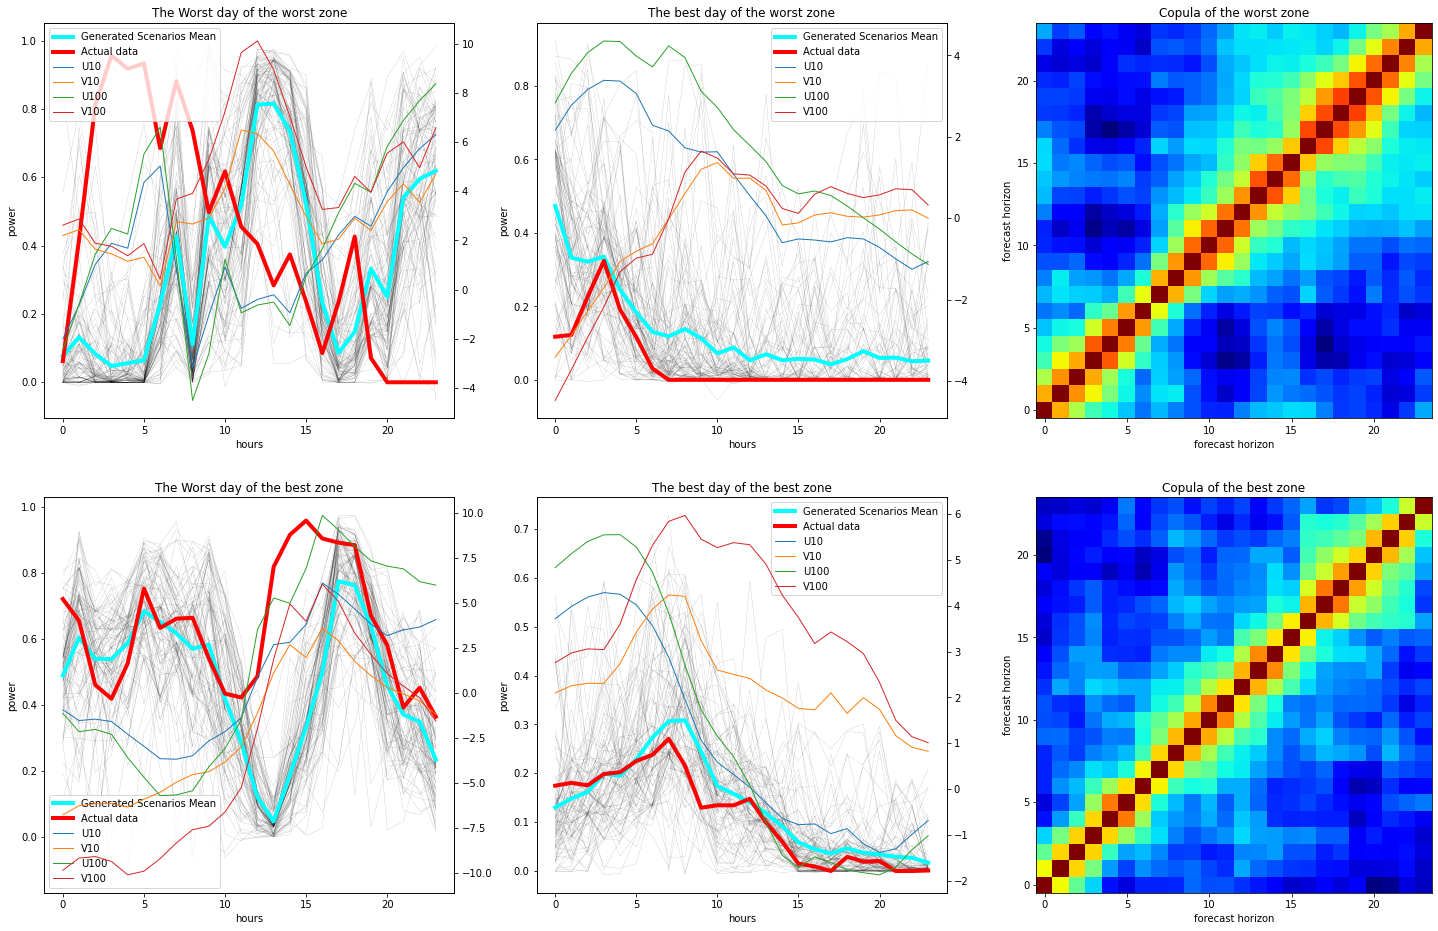

In [274]:
mean_scores = np.array(mean_scores)
Worst_zone = 'ZONE_' + str(np.argmax(mean_scores) + 1)
Best_zone = 'ZONE_' + str(np.argmin(mean_scores) + 1)

columns = 3
rows = 2

fig, ax = plt.subplots(rows, columns, figsize=(25, 16))

worst_day = np.argmax(dict_results[Worst_zone]['energy_scores'])
best_day = np.argmin(dict_results[Worst_zone]['energy_scores'])

ax[0, 0].set_title("The Worst day of the worst zone")
ax[0, 0].plot(dict_results[Worst_zone]['predictions'][worst_day*24:worst_day*24+24], color='k', alpha=0.25, linewidth = 0.3)
lns = ax[0, 0].plot(dict_results[Worst_zone]['predictions'][worst_day*24:worst_day*24+24].mean(axis=1), color='cyan', label='Generated Scenarios Mean', linewidth=4)
lns += ax[0, 0].plot(np.arange(24), dict_results[Worst_zone]['Ys'][worst_day], color='red', linewidth=4, label='Actual data')
ax2 = ax[0, 0].twinx()
for columnName, columnData in dict_results[Worst_zone]['weather_features'][worst_day].iteritems():
    lns += ax2.plot(np.arange(24), columnData, label=columnName, linewidth = 1)
labs = [l.get_label() for l in lns]
ax[0, 0].legend(lns, labs, loc=0)
ax[0, 0].set_ylabel('power')
ax[0, 0].set_xlabel('hours')

ax[0, 1].set_title("The best day of the worst zone")
ax[0, 1].plot(dict_results[Worst_zone]['predictions'][best_day*24:best_day*24+24], color='k', alpha=0.25, linewidth = 0.3)
lns = ax[0, 1].plot(dict_results[Worst_zone]['predictions'][best_day*24:best_day*24+24].mean(axis=1), color='cyan', label='Generated Scenarios Mean', linewidth=4)
lns += ax[0, 1].plot(np.arange(24), dict_results[Worst_zone]['Ys'][best_day], color='red', linewidth=4, label='Actual data')
ax2 = ax[0, 1].twinx()
for columnName, columnData in dict_results[Worst_zone]['weather_features'][best_day].iteritems():
    lns += ax2.plot(np.arange(24), columnData, label=columnName, linewidth = 1)
labs = [l.get_label() for l in lns]
ax[0, 1].legend(lns, labs, loc=0)
ax[0, 1].set_ylabel('power')
ax[0, 1].set_xlabel('hours')

ax[0, 2].set_title("Copula of the worst zone")
pos = ax[0, 2].imshow(cov_matrixes[Worst_zone], cmap='jet', origin='lower')
ax[0, 2].set_xlabel('forecast horizon')
ax[0, 2].set_ylabel('forecast horizon')

worst_day = np.argmax(dict_results[Best_zone]['energy_scores'])
best_day = np.argmin(dict_results[Best_zone]['energy_scores'])

ax[1, 0].set_title("The Worst day of the best zone")
ax[1, 0].plot(dict_results[Best_zone]['predictions'][worst_day*24:worst_day*24+24], color='k', alpha=0.25, linewidth = 0.3)
lns = ax[1, 0].plot(dict_results[Best_zone]['predictions'][worst_day*24:worst_day*24+24].mean(axis=1), color='cyan', label='Generated Scenarios Mean', linewidth=4)
lns += ax[1, 0].plot(np.arange(24), dict_results[Best_zone]['Ys'][worst_day], color='red', linewidth=4, label = 'Actual data')
ax2 = ax[1, 0].twinx()
for columnName, columnData in dict_results[Best_zone]['weather_features'][worst_day].iteritems():
    lns += ax2.plot(np.arange(24), columnData, label=columnName, linewidth = 1)
labs = [l.get_label() for l in lns]
ax[1, 0].legend(lns, labs, loc=0)
ax[1, 0].set_ylabel('power')
ax[1, 0].set_xlabel('hours')


ax[1, 1].set_title("The best day of the best zone")
ax[1, 1].plot(dict_results[Best_zone]['predictions'][best_day*24:best_day*24+24], color='k', alpha=0.25, linewidth = 0.3)
lns = ax[1, 1].plot(dict_results[Best_zone]['predictions'][best_day*24:best_day*24+24].mean(axis=1), color='cyan', label='Generated Scenarios Mean', linewidth=4)
lns += ax[1, 1].plot(np.arange(24), dict_results[Best_zone]['Ys'][best_day], color='red', linewidth=4, label = 'Actual data')
ax2 = ax[1, 1].twinx()
for columnName, columnData in dict_results[Best_zone]['weather_features'][best_day].iteritems():
    lns += ax2.plot(np.arange(24), columnData, label=columnName, linewidth = 1)
labs = [l.get_label() for l in lns]
ax[1, 1].legend(lns, labs, loc=0)
ax[1, 1].set_ylabel('power')
ax[1, 1].set_xlabel('hours')

ax[1, 2].set_title("Copula of the best zone")
pos = ax[1, 2].imshow(cov_matrixes[Best_zone], cmap='jet', origin='lower')
ax[1, 2].set_xlabel('forecast horizon')
ax[1, 2].set_ylabel('forecast horizon')

plt.show()

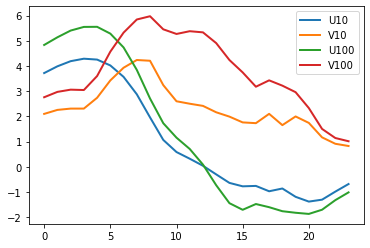

In [217]:
for columnName, columnData in dict_results[Best_zone]['weather_features'][best_day].iteritems():
    plt.plot(np.arange(24), columnData, label=columnName, linewidth = 2)
plt.legend()
plt.show()

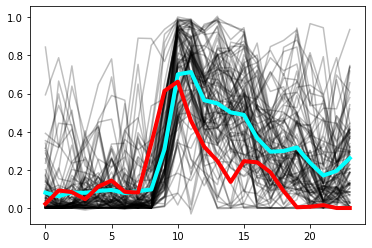

In [149]:
plt.plot(generated_scenarios.values, color='k', alpha=0.25)
plt.plot(generated_scenarios.values.mean(axis=1), color='cyan', label='Generated Scenarios Mean', linewidth=4)
plt.plot(np.arange(24), actual_data, color='red', linewidth=4)
plt.show()

In [171]:
generated_scenarios.values.shape

(24, 100)

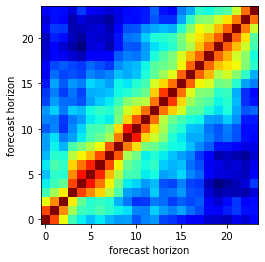

In [150]:
plt.imshow(cov_matrixes['ZONE_1'], cmap='jet', origin='lower')
plt.xlabel('forecast horizon')
plt.ylabel('forecast horizon')

plt.show()

In [ ]:
#0) correct the date issue
#1) apply on solar and power
#2) do some stuff with visualization - best and worth scores of best and worth zones
#3) feature engineering (include time of the day)


#1) Weather features subplot
#2) Add weather features visualizations